### Feature selection by Information Gain

    Feature selection using information gain is a common technique in machine learning to identify and select relevant features for a given task. Information gain is a measure of the reduction in uncertainty about the target variable (or class) brought by the inclusion of a particular feature. It is often used in the context of decision trees.

    The basic idea is to select features that provide the most information about the target variable. 
    The information gain IG for a feature A with respect to a target variable T is calculated as follows:
    
    IG(A,T)=H(T)−H(T∣A)

    where,
    H(T) is the entropy of the target variable 
    H(T∣A) is the conditional entropy of T given the feature A.



### Physical Significance of Information Gain 
  
    Yes, information gain can be negative. Information gain is a measure of the effectiveness of a feature in reducing uncertainty about the target variable. If the inclusion of a feature results in a reduction of entropy (uncertainty), the information gain is positive. However, if the inclusion of a feature increases entropy, the information gain can be negative.

    In decision trees and feature selection, you typically aim to maximize information gain. Features that provide more information about the target variable are preferred. If a feature has a negative information gain, it may not be contributing useful information, and the algorithm might choose to exclude it during feature selection.

    So, to summarize, while information gain can be negative, it is generally preferred to have positive information gain for effective feature selection.

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
import matplotlib as plt

In [2]:
cancer = pd.read_csv("D:\Data for Preprocessing\Cancer.csv")

In [4]:
cancer

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'
...,...,...,...,...,...,...,...,...,...,...
281,'50-59','ge40','30-34','6-8','yes','2','left','left_low','no','no-recurrence-events'
282,'50-59','premeno','25-29','3-5','yes','2','left','left_low','yes','no-recurrence-events'
283,'30-39','premeno','30-34','6-8','yes','2','right','right_up','no','no-recurrence-events'
284,'50-59','premeno','15-19','0-2','no','2','right','left_low','no','no-recurrence-events'


In [3]:
X = cancer.iloc[:, :-1]
y = cancer['class']

In [5]:
X = X.astype('str')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)

In [7]:
# Perform Ordinal Encoding on the Dataset
oe = OrdinalEncoder()
oe.fit(X_train)
X_train_enc = oe.transform(X_train)
X_test_enc = oe.transform(X_test)

In [8]:
X_train_enc = pd.DataFrame(X_train_enc)

In [9]:
X_train_enc.columns = X.columns

In [10]:
X_train_enc

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate
0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0
1,1.0,2.0,9.0,0.0,0.0,1.0,0.0,3.0,0.0
2,3.0,2.0,10.0,0.0,1.0,1.0,1.0,2.0,1.0
3,1.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,3.0,0.0,0.0,1.0,1.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...
186,2.0,2.0,4.0,0.0,0.0,0.0,1.0,3.0,0.0
187,3.0,2.0,4.0,0.0,0.0,2.0,1.0,1.0,1.0
188,4.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
189,4.0,0.0,7.0,0.0,0.0,1.0,1.0,1.0,0.0


In [11]:
# Perform the label encoding 
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)


In [13]:
# Feature Selection
fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X_train_enc, y_train_enc)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)

In [16]:
fs

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x0000020A91461280>)

In [17]:
fs_score = pd.DataFrame(fs.scores_)

In [18]:
fs_score

,0
0,0.010689
1,0.000000
2,0.039024
3,0.000000
4,0.059968
5,0.020190
6,0.005444
7,0.016351
8,0.043606


In [19]:
fs_score.index = X.columns

In [20]:
fs_score

,0
age,0.010689
menopause,0.000000
tumor-size,0.039024
inv-nodes,0.000000
node-caps,0.059968
deg-malig,0.020190
breast,0.005444
breast-quad,0.016351
irradiate,0.043606


In [21]:
fs_score = fs_score.rename({0:'Score'}, axis=1)

In [22]:
fs_score

,Score
age,0.010689
menopause,0.000000
tumor-size,0.039024
inv-nodes,0.000000
node-caps,0.059968
deg-malig,0.020190
breast,0.005444
breast-quad,0.016351
irradiate,0.043606


<AxesSubplot:>

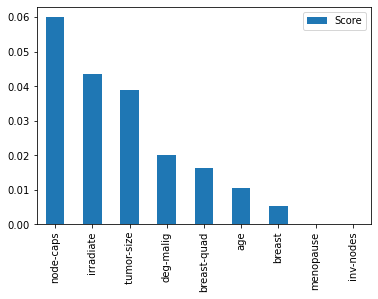

In [23]:
fs_score.sort_values(by = ['Score'], ascending=False).plot(kind = 'bar')